# Análise Exploratória dos Dados (EDA)

Este notebook tem como objetivo realizar uma análise exploratória dos dados fornecidos para entender melhor o comportamento das variáveis e responder às perguntas de negócio relacionadas à plataforma de aluguéis temporários em Nova York. O conjunto de dados contém informações sobre os anúncios de imóveis para alugar temporariamente na cidade, fornecendo detalhes sobre o preço, a localização, o tipo de imóvel, a disponibilidade e o número de avaliações, entre outras variáveis. Este dataset pode ser utilizado para entender padrões de precificação e outros fatores que influenciam as escolhas de locação.

### Informações do conjunto de dados
1. id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
2. nome - Representa o nome do anúncio
3. host_id - Representa o id do usuário que hospedou o anúncio
4. host_name – Contém o nome do usuário que hospedou o anúncio
5. bairro_group - Contém o nome do bairro onde o anúncio está localizado
6. bairro - Contém o nome da área onde o anúncio está localizado
7. latitude - Contém a latitude do local
8. longitude - Contém a longitude do local
9. room_type – Contém o tipo de espaço de cada anúncio
10. price - Contém o preço por noite em dólares listado pelo anfitrião
11. minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
12. numero_de_reviews - Contém o número de comentários dados a cada listagem
13. ultima_review - Contém a data da última revisão dada à listagem
14. reviews_por_mes - Contém o número de avaliações fornecidas por mês
15. calculado_host_listings_count - Contém a quantidade de listagem por host
16. disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

# Carregando o dataset
df = pd.read_csv('../data/teste_indicium_precificacao.csv')

## 1. Inspeção do conjunto de dados de forma macro

Vamos iniciar a análise do conjunto de dados verificando as primeiras linhas e informações dos dados para termos uma visão inicial dos dados.

In [3]:
# Verificando as primeiras linhas do Data Frame
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
# Verificando as dimensões do arquivo
df.shape

(48894, 16)

In [5]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## 2. Verificando se existem dados ausentes ou inconsistentes

Vamos verificar se o dataset contém valores ausentes (nulos) ou quaisquer inconsistências, como valores que não fazem sentido para as variáveis.

In [6]:
# Verificando se existem valores nulos
df.isnull().sum()

df.drop_duplicates()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
# Verificando se há preços negativos ou zero e apenas exibindo a contagem
precos_invalidos = df[df['price'] <= 0].shape[0]

print(f'Número de preços negativos ou zero: {precos_invalidos}')

Número de preços negativos ou zero: 11


In [8]:
# Verificando latitudes e longitudes inválidas
latitudes_invalidas = df[(df['latitude'] < -90) | (df['latitude'] > 90) | (df['longitude'] < -180) | (df['longitude'] > 180)].shape[0]

print(f'Número de latitudes ou longitudes inválidas: {latitudes_invalidas}')

Número de latitudes ou longitudes inválidas: 0


In [9]:
# Verificando 'minimo_noites' inválidos (valores negativos ou zero)
minimo_noites_invalidos = df[df['minimo_noites'] <= 0] 

# Exibindo os resultados
print(f'Número de valores inválidos (menor ou igual a 0): {minimo_noites_invalidos.shape[0]}')

Número de valores inválidos (menor ou igual a 0): 0


In [10]:
# Verificando valores inválidos (menor que 0 ou maior que 365)
disponibilidade_invalidos = df[(df['disponibilidade_365'] < 0) | (df['disponibilidade_365'] > 365)]

# Exibindo os resultados
print(f'Número de valores inválidos (menor que 0 ou maior que 365): {disponibilidade_invalidos.shape[0]}')

Número de valores inválidos (menor que 0 ou maior que 365): 0


## 3. Tratamento de valores nulos ou inconsistentes

In [11]:
# Completando valores nulos como "Desconhecido"
df['nome'] = df['nome'].fillna('Desconhecido')
df['host_name'] = df['host_name'].fillna('Desconhecido')

In [12]:
# Removendo valores com precos inválidos
df = df[df['price'] > 0]

## 4. Análise e Transformação de Variáveis Categóricas

In [13]:
# Encontrando o total de valores únicos para cada variável
# Identificando o total de valores únicos para cada variável
valores_unicos = df.nunique()

# Exibindo os resultados
valores_unicos

id                               48883
nome                             47894
host_id                          37455
host_name                        11451
bairro_group                         5
bairro                             221
latitude                         19046
longitude                        14715
room_type                            3
price                              673
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

In [14]:
# Transformando 'room_type' em variável categórica
df['room_type'] = df['room_type'].astype('category')

In [15]:
# Transformando 'bairro_group' em variável categórica
df['bairro_group'] = df['bairro_group'].astype('category')

In [16]:
# Transformando 'bairro' em variável categórica
df['bairro'] = df['bairro'].astype('category')

In [17]:
# Convertendo a coluna 'ultima_review' para o tipo datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

In [18]:
# Exibindo o tipo de dados de todas as colunas do DataFrame, para verificar se as convesões ocorreram com sucesso
df.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                           category
bairro                                 category
latitude                                float64
longitude                               float64
room_type                              category
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

## 4. Visualização de Medidas Estatísticas do Conjunto de Dados

Nesta etapa, vamos calcular as principais medidas estatísticas do conjunto de dados para entender a distribuição e as características das variáveis numéricas. 

In [19]:
# Visualizando medidas estatísticas do conjunto de dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48883.00,48883.00,48883.00,48883.00,48883.00,48883.00,48883.00,38832,38832.00,48883.00,48883.00
mean,19017182.38,67623417.85,40.73,-73.95,152.76,7.03,23.27,2018-10-04 01:14:36.637824256,1.37,7.14,112.77
min,2595.00,2438.00,40.50,-74.24,10.00,1.00,0.00,2011-03-28 00:00:00,0.01,1.00,0.00
25%,9470615.50,7819573.50,40.69,-73.98,69.00,1.00,1.00,2018-07-08 00:00:00,0.19,1.00,0.00
50%,19675743.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,2019-05-19 00:00:00,0.72,1.00,45.00
75%,29153034.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2019-06-23 00:00:00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,2019-07-08 00:00:00,58.50,327.00,365.00
std,10984090.71,78616871.53,0.05,0.05,240.17,20.51,44.55,NaN,1.68,32.96,131.62


In [20]:
# Visualizando as estatísticas descritivas das variáveis numéricas do conjunto de dados
df_cleaned = df.drop(['id', 'host_id','ultima_review'], axis=1)
df_cleaned.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48883.00,48883.00,48883.00,48883.00,48883.00,38832.00,48883.00,48883.00
mean,40.73,-73.95,152.76,7.03,23.27,1.37,7.14,112.77
std,0.05,0.05,240.17,20.51,44.55,1.68,32.96,131.62
min,40.50,-74.24,10.00,1.00,0.00,0.01,1.00,0.00
25%,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


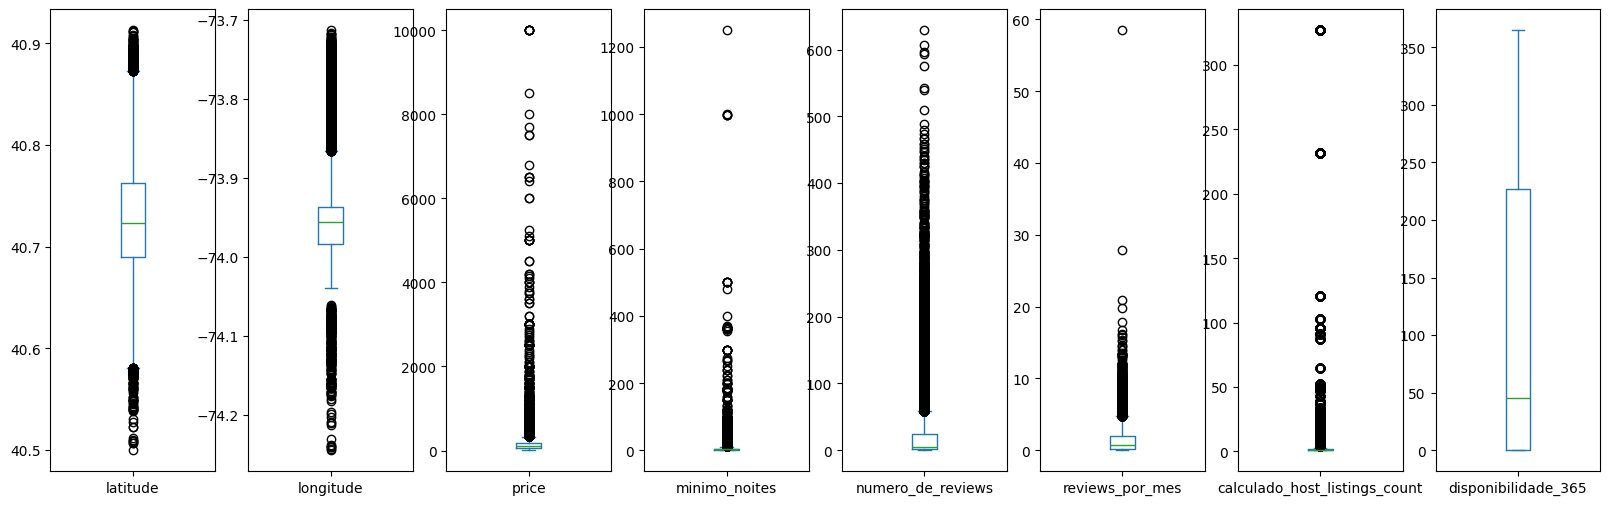

In [21]:
# Gerar o boxplot com 2 linhas e o número adequado de colunas
df_cleaned.plot(kind='box', figsize=(20, 6), subplots=True);

## 5. Avaliando as variaveis de forma individual

In [22]:
# Descrição estatística dos preços pelo tipo de locação
df_by_room_type = df.groupby('room_type', observed=True)['price']
df_by_room_type.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25407.00,211.81,284.05,10.00,120.00,160.00,229.00,10000.00
Private room,22318.00,89.81,160.23,10.00,50.00,70.00,95.00,10000.00
Shared room,1158.00,70.25,101.77,10.00,33.00,45.00,75.00,1800.00


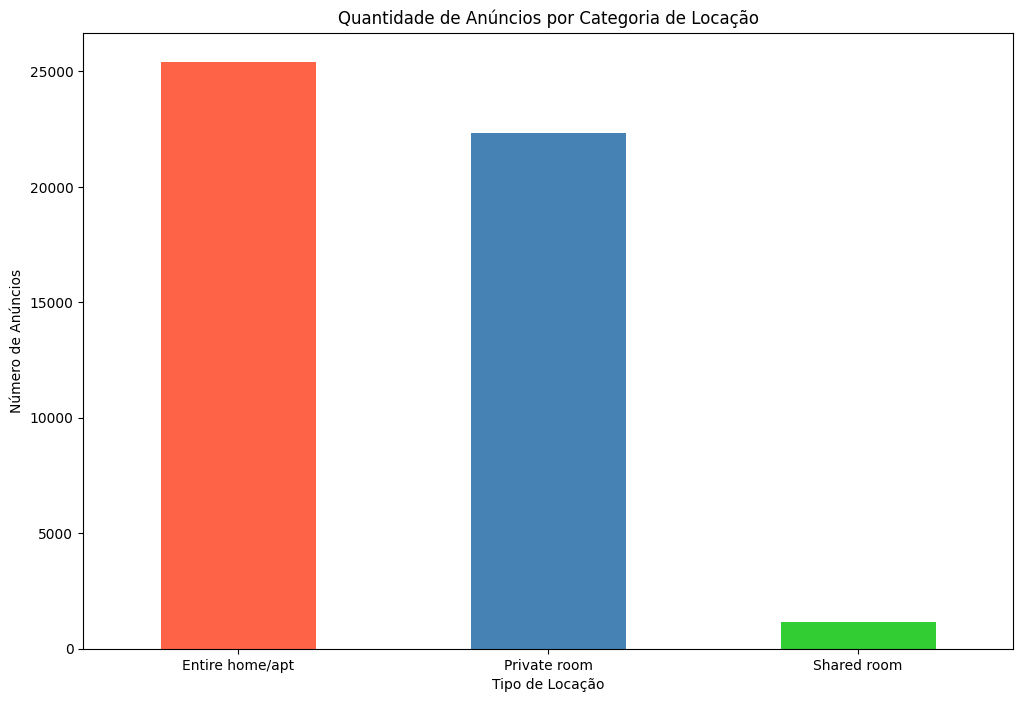

In [23]:
# Gerando gráfico para mostrar
df_by_room_type.count().plot(kind='bar', figsize=(12,8), color=['#FF6347', '#4682B4', '#32CD32'], layout=(2, 2), legend=False)
plt.xlabel('Tipo de Locação')
plt.ylabel('Número de Anúncios')
plt.xticks(rotation=0) 
plt.title('Quantidade de Anúncios por Categoria de Locação')
plt.show()

O gráfico acima revela que a maior parte dos anúncios está nas categorias apartamento inteiro e quarto privado, indicando que essas são as opções mais procuradas no mercado de locações.

In [24]:
# Agrupando por 'bairro_group' e mostrando a descrição estatística dos preços
df_by_neighboor_group = df.groupby('bairro_group', observed=True)['price']
df_by_neighboor_group.describe()

,count,mean,std,min,25%,50%,75%,max
bairro_group,,,,,,,,
Bronx,1090.00,87.58,106.73,10.00,45.00,65.00,99.00,2500.00
Brooklyn,20094.00,124.44,186.90,10.00,60.00,90.00,150.00,10000.00
Manhattan,21660.00,196.88,291.39,10.00,95.00,150.00,220.00,10000.00
Queens,5666.00,99.52,167.10,10.00,50.00,75.00,110.00,10000.00
Staten Island,373.00,114.81,277.62,13.00,50.00,75.00,110.00,5000.00


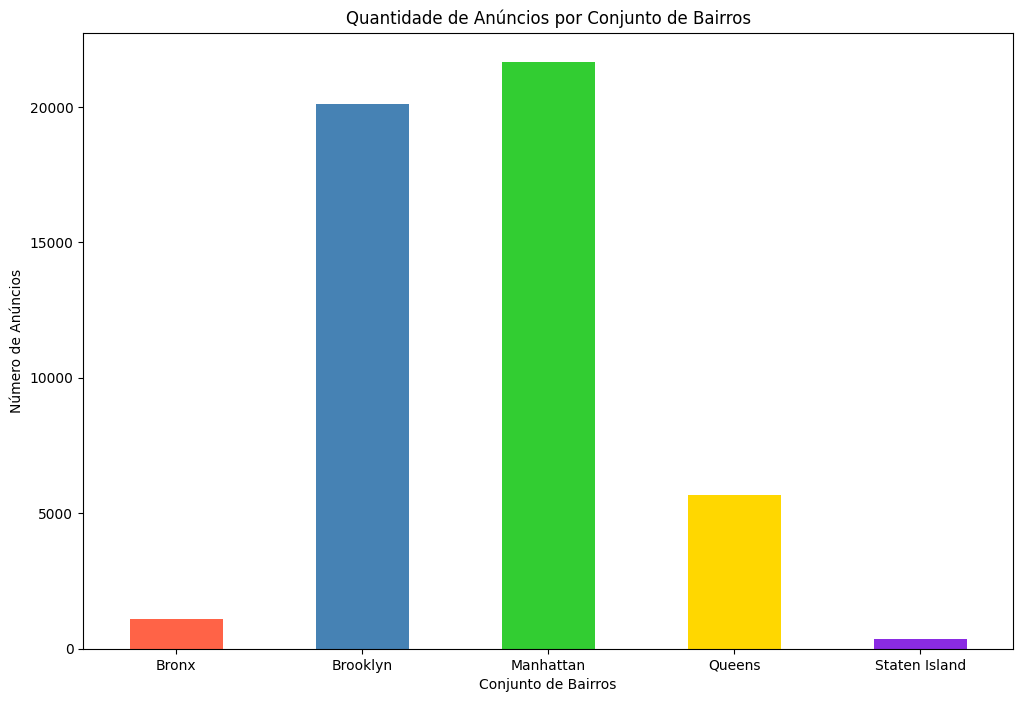

In [25]:
# Gerando gráfico para mostrar a variação do numero de locações por região
df_by_neighboor_group.count().plot(kind='bar', figsize=(12, 8), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'], legend=False)
plt.xlabel('Conjunto de Bairros')
plt.ylabel('Número de Anúncios')
plt.xticks(rotation=0)
plt.title('Quantidade de Anúncios por Conjunto de Bairros')
plt.show()

O gráfico revela as diferenças de preços de locação entre os bairros de Nova York. Manhattan tem os preços mais altos, com uma média de 196,88 dólares, seguida por Brooklyn, com 124,44 dólares. O Bronx oferece opções mais acessíveis, com uma média de 87,58 dólares, enquanto Queens e Staten Island ficam na faixa intermediária. A grande variação dentro de cada bairro, especialmente em Manhattan e Brooklyn, reflete a ampla gama de opções disponíveis, tanto de luxo quanto mais econômicas.

In [26]:
bins = [0, 100, 200, 500, 1000, 5000, 10000]  
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+'] 

# Categorizando os preços dos imóveis de acordo com as faixas definidas
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# Agrupando por faixas de preço e mostrando informações estatisticas
df_by_price_range = df.groupby('price_range', observed=True)['price']
df_by_price_range.describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0-100,23917.00,67.89,20.82,10.00,50.00,68.00,85.00,100.00
100-200,16582.00,150.26,29.44,101.00,125.00,150.00,175.00,200.00
200-500,7340.00,296.79,76.55,201.00,240.00,275.00,349.00,500.00
500-1000,805.00,720.80,145.70,503.00,600.00,699.00,800.00,1000.00
1000-5000,219.00,2004.10,954.74,1002.00,1299.50,1700.00,2500.00,5000.00
5000+,20.00,7713.45,1744.86,5100.00,6479.75,7500.00,9999.00,10000.00


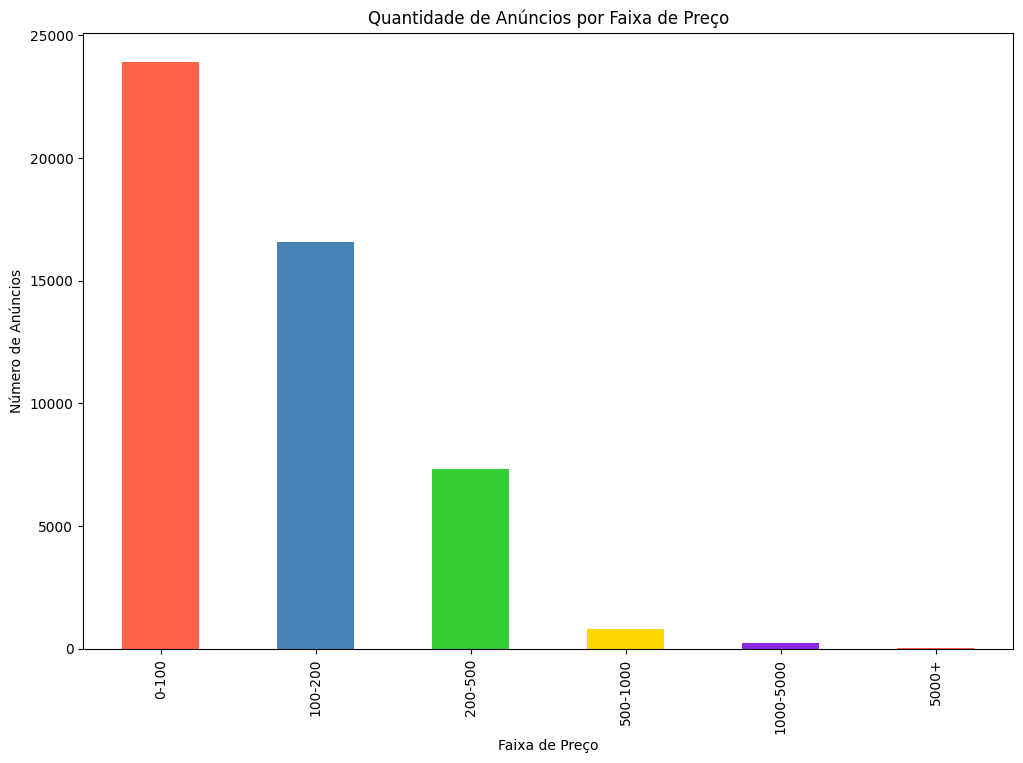

In [27]:
# Gerando gráfico de barras baseado no preco médio
ax = df_by_price_range.count().plot(kind='bar', figsize=(12, 8), color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Número de Anúncios')
plt.title('Quantidade de Anúncios por Faixa de Preço')
plt.show()

Ao analisarmos o gráfico acima, fica claro que a grande maioria das locações em Nova York está na faixa de preço entre 50 e 200 dólares por noite. Mais especificamente, a maior concentração está nas faixas de 50-100 e 100-200 dólares, sugerindo que muitas pessoas buscam opções mais acessíveis para se hospedarem. Esses preços mais baixos predominam, o que provavelmente reflete a alta demanda por acomodações que atendam ao orçamento de viajantes que não estão dispostos a gastar muito, mas ainda assim procuram um bom lugar para ficar.

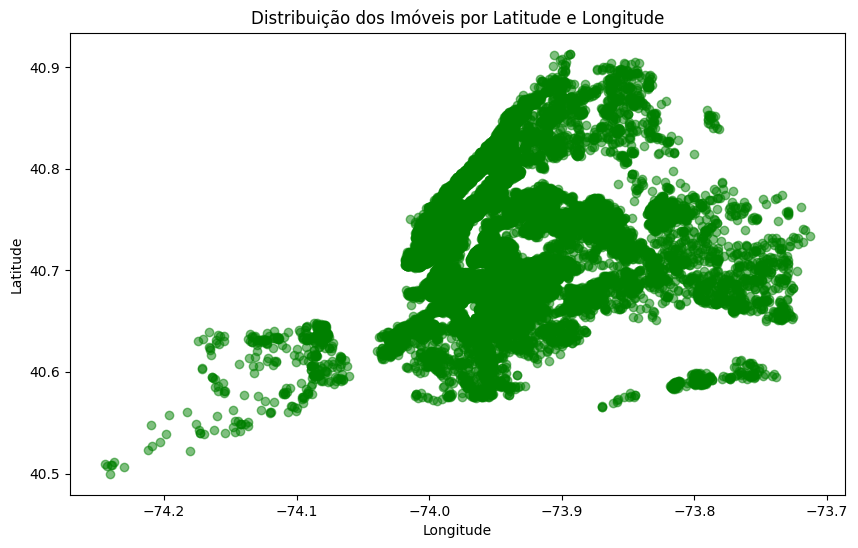

In [28]:
# Criando o gráfico de dispersão entre latitude e longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, color='green')

# Adicionando rótulos e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição dos Imóveis por Latitude e Longitude')

# Exibindo o gráfico
plt.show()

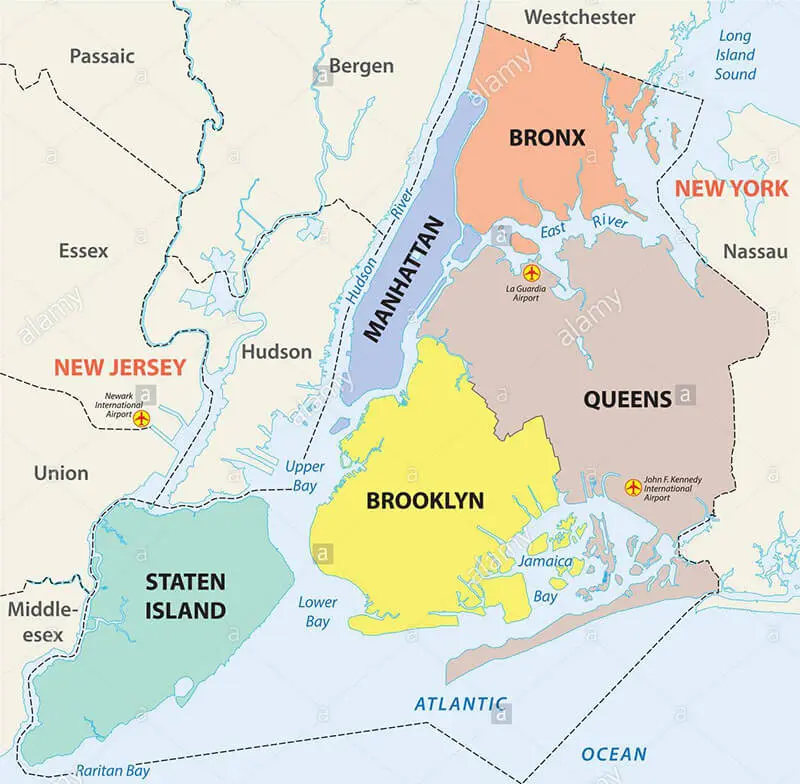

In [29]:
from IPython.display import Image
Image('../utils/images/mapa_nova_york.jpg')

Como podemos observar no gráfico de dispersão, há uma grande concentração de imóveis para locação na região de Manhattan e Brooklyn e áreas adjacentes, incluindo partes do Bronx e Brooklyn, o que reflete a diversidade e a dinâmica do mercado nessas regiões

## 6. Avaliando a relação de cada variável x variável alvo
Nesta etapa, vamos analisar como cada variável do conjunto de dados influencia o preço dos anúncios, utilizando visualizações gráficas para facilitar a comparação e identificar padrões.

In [30]:
# Configurando o plot
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams["figure.autolayout"] = True

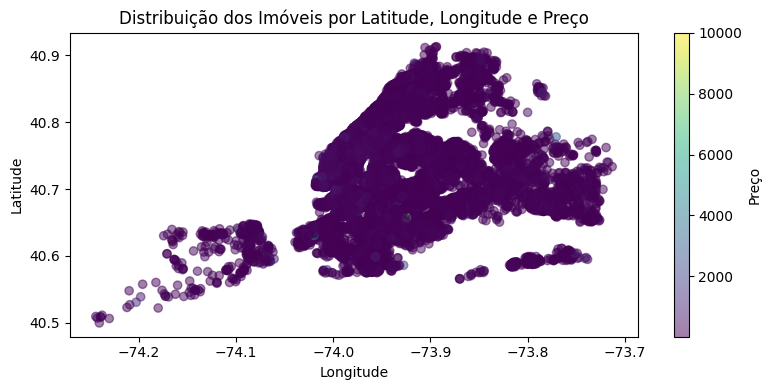

In [31]:
# Gerando um grafico de disperção colorido pelo preço
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='viridis', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição dos Imóveis por Latitude, Longitude e Preço')

# Adicionando barra de cor para tabelar o preço e mostrando o gráfico
plt.colorbar(scatter, label='Preço')
plt.show()

Como é possível observar, além de Manhattan concentrar a maior quantidade de imóveis anunciados para locação, é também a região com os preços mais elevados. Brooklyn e partes de Queens seguem a mesma tendência, com uma grande oferta de anúncios e valores mais altos em comparação com outras áreas da cidade. Enquanto Staten Island  possui uma quantidade significativamente menor de anúncios e preços mais acessíveis, refletindo uma menor demanda e um perfil de mercado diferente das áreas mais centrais, como Manhattan e Brooklyn.

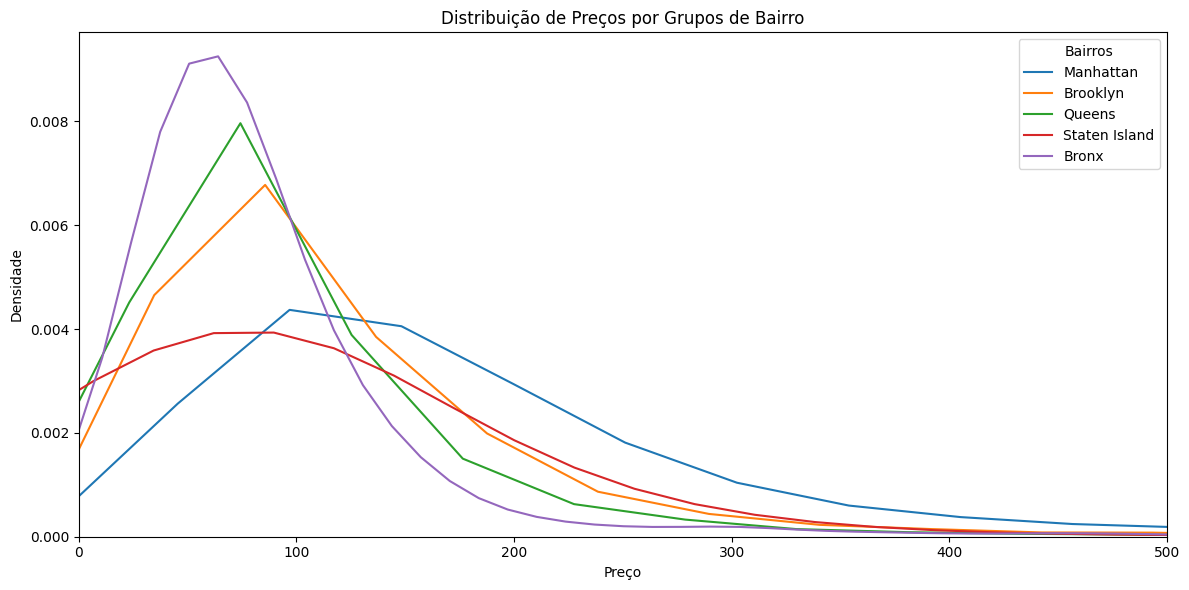

In [32]:
# Obtendo os diferentes grupos de bairros únicos no dataset
bairro_groups = df["bairro_group"].unique()

# Gerando gráficos de densidade para cada bairro
plt.figure(figsize=(12, 6))
for bairro in bairro_groups:
    subset = df[df["bairro_group"] == bairro]
    sns.kdeplot(subset["price"], label=bairro)

# Adicionando a legenda e título e mostrando o gráfico
plt.legend(title="Bairros")
plt.xlabel("Preço")
plt.ylabel("Densidade")
plt.title("Distribuição de Preços por Grupos de Bairro")
plt.xlim(0, 500) 
plt.show()

In [33]:
# Definindo faixas de preço para categorizar os valores
bins = [0, 100, 200, 500, 1000, 5000, 10000]  
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+'] 

# Categorizando os preços dos imóveis de acordo com as faixas definidas
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels) 

# Agrupando os dados por bairro e faixa de preço, contando o número de imóveis em cada faixa
bairro_price_distribution = df.groupby(['bairro_group', 'price_range'], observed=False).size().unstack()

# Adicionando a coluna 'Total' para cada bairro
bairro_price_distribution['Total'] = bairro_price_distribution.sum(axis=1)
print(bairro_price_distribution)

price_range    0-100  100-200  200-500  500-1000  1000-5000  5000+  Total
bairro_group                                                             
Bronx            864      181       38         6          1      0   1090
Brooklyn       11762     6277     1826       175         50      4  20094
Manhattan       6920     8803     5164       601        157     15  21660
Queens          4101     1243      293        19          9      1   5666
Staten Island    270       78       19         4          2      0    373


Podemos perceber, olhando no gráfico de densidade e na tabela de preços, que grande parte das casas para locação no Bronx (80%) estão na faixa de preços mais acessível, entre 0 e 100 dólares. Isso mostra que, nesse bairro, a maior parte dos imóveis é bastante acessível. Bairros como Brooklyn, Queens e Staten Island também seguem essa tendência, com mais de 90% dos imóveis abaixo de 200 dólares. Já em Manhattan, a situação é diferente, com apenas 72% dos imóveis dentro dessa faixa, o que evidencia uma maior presença de imóveis de alto custo na região.

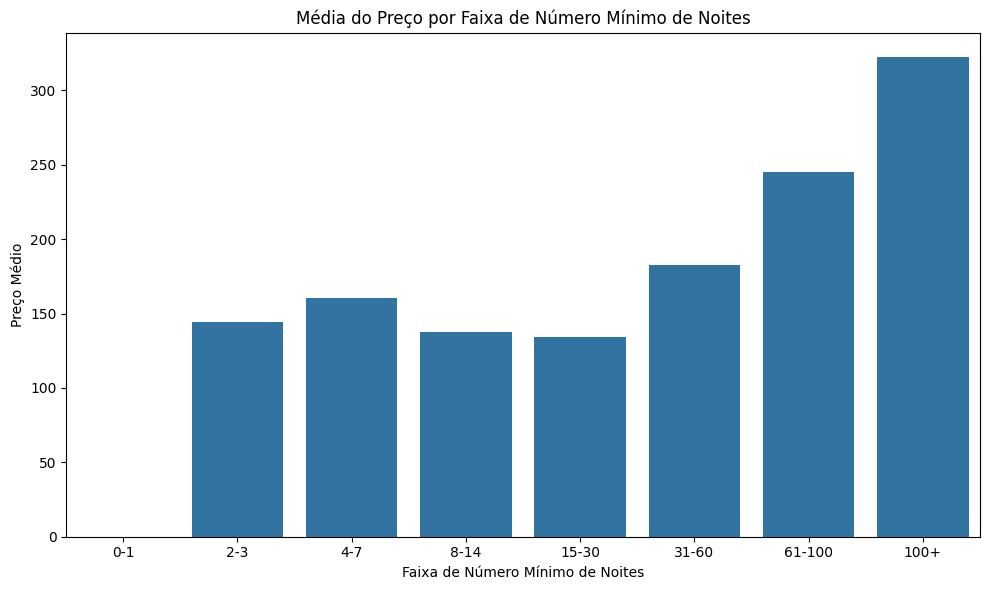

In [44]:
# Definindo faixas para o número mínimo de noites
bins_noites = [0, 1, 3, 7, 14, 30, 60, 100, float('inf')]  # Faixas entre 0, 1, 3, 7, 14, etc.
labels_noites = ['0-1', '2-3', '4-7', '8-14', '15-30', '31-60', '61-100', '100+']

# Categorizando o número mínimo de noites de acordo com as faixas definidas
df['minimo_noites_range'] = pd.cut(df['minimo_noites'], bins=bins_noites, labels=labels_noites, right=False)

# Agrupando por faixa de número mínimo de noites e calculando a média do preço
df_avg_price_by_range = df.groupby('minimo_noites_range', observed=True)['price'].mean().reset_index()

# Gráfico de barras para a média do preço por faixa de número mínimo de noites
plt.figure(figsize=(10, 6))
sns.barplot(x='minimo_noites_range', y='price', data=df_avg_price_by_range)
plt.title('Média do Preço por Faixa de Número Mínimo de Noites')
plt.xlabel('Faixa de Número Mínimo de Noites')
plt.ylabel('Preço Médio')
plt.show()

In [ ]:
Percebe-se que alugueis diários